In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 30})

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


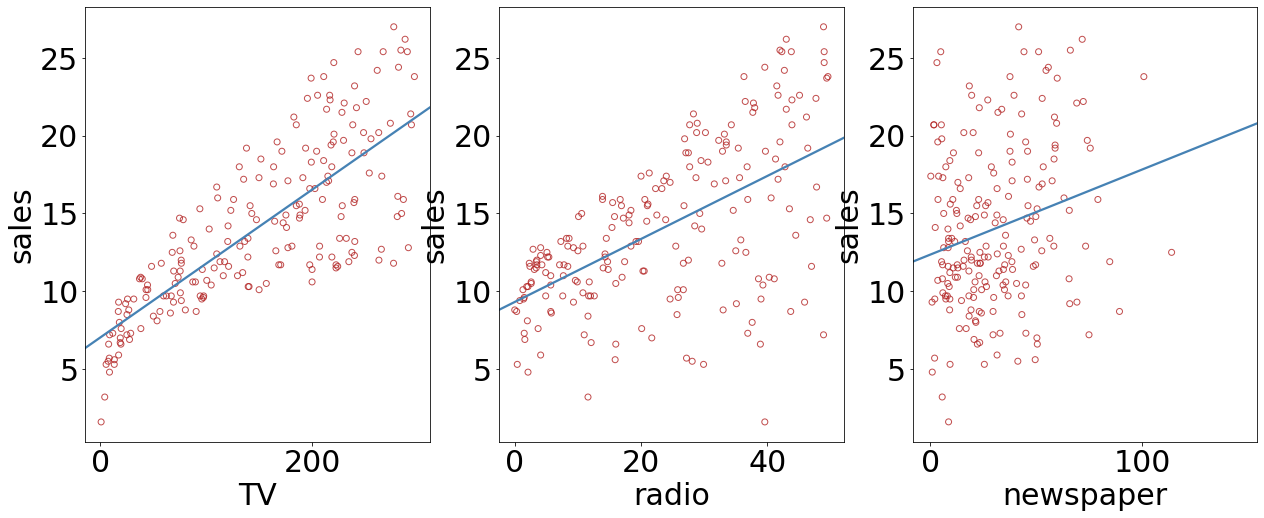

In [4]:
scatter_dict = {"color":"firebrick", "facecolors":"none"}
line_dict = {"color":"steelblue"}

fig, axs = plt.subplots(ncols=3, figsize=(21,8))
sns.regplot(x='TV', y='sales', data=data, ax=axs[0], ci=None, scatter_kws=scatter_dict, line_kws=line_dict)
sns.regplot(x='radio', y='sales', data=data, ax=axs[1], ci=None, scatter_kws=scatter_dict, line_kws=line_dict)
sns.regplot(x='newspaper',y='sales', data=data, ax=axs[2], ci=None, scatter_kws=scatter_dict, line_kws=line_dict)

In [5]:
fig.savefig("Reg_1.png")

In [6]:
default = pd.read_csv("Default.csv")

In [7]:
default.head(20)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
5,6,No,Yes,919.588530,7491.558572
6,7,No,No,825.513331,24905.226578
7,8,No,Yes,808.667504,17600.451344
8,9,No,No,1161.057854,37468.529288
9,10,No,No,0.000000,29275.268293


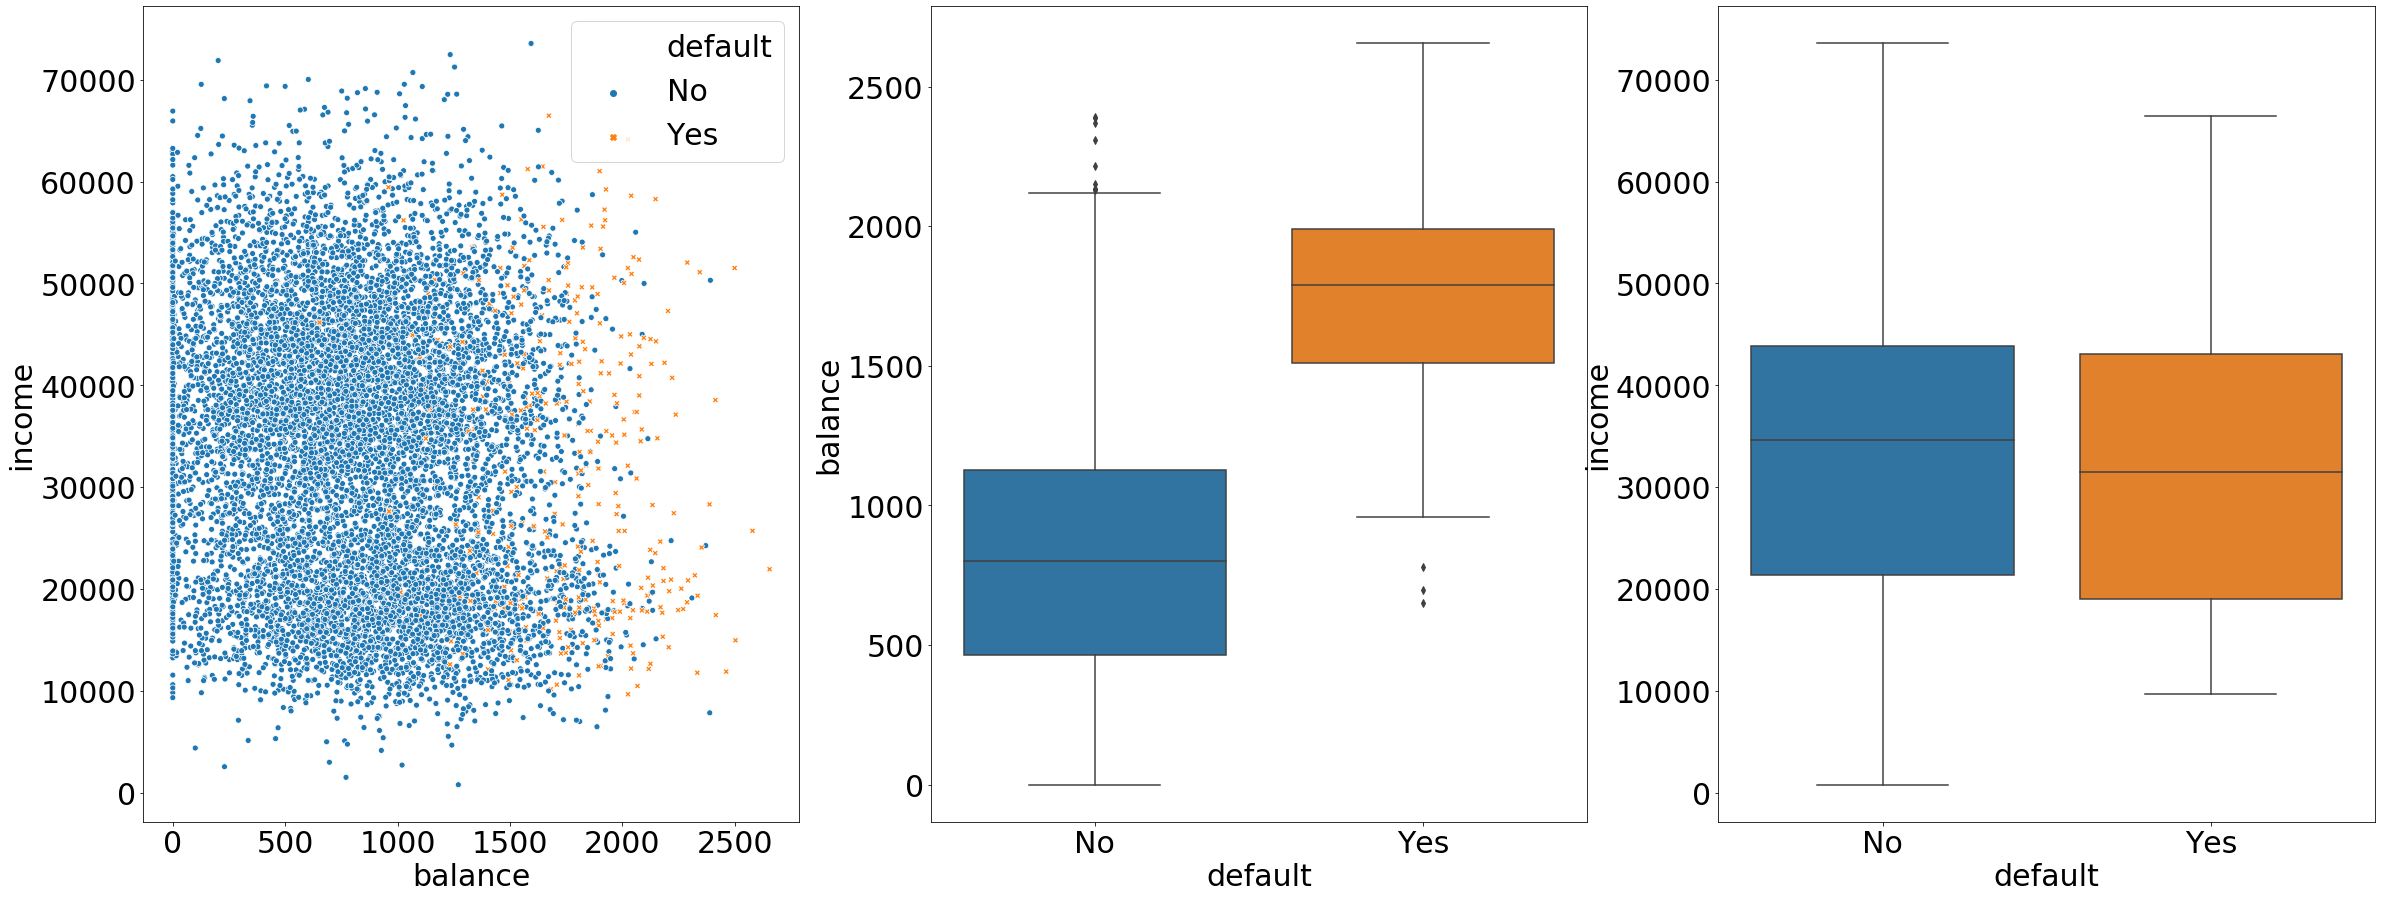

In [8]:
fig2, axs2 = plt.subplots(ncols=3, figsize=(40,15))
sns.scatterplot(x="balance", y="income", hue="default", style="default", data=default, ax = axs2[0])
sns.boxplot(x="default", y="balance", data=default, ax=axs2[1])
sns.boxplot(x="default", y="income", data=default, ax=axs2[2])

In [9]:
fig2.savefig("logistic2.png")

In [10]:
def defCode(x):
    if x == "Yes":
        return 1.0
    else:
        return 0.0
    
default["Probability of Default"] = list([defCode(x) for x in default["default"]])

In [11]:
default.head(5)

,Unnamed: 0,default,student,balance,income,Probability of Default
0,1,No,No,729.526495,44361.625074,0.0
1,2,No,Yes,817.180407,12106.134700,0.0
2,3,No,No,1073.549164,31767.138947,0.0
3,4,No,No,529.250605,35704.493935,0.0
4,5,No,No,785.655883,38463.495879,0.0


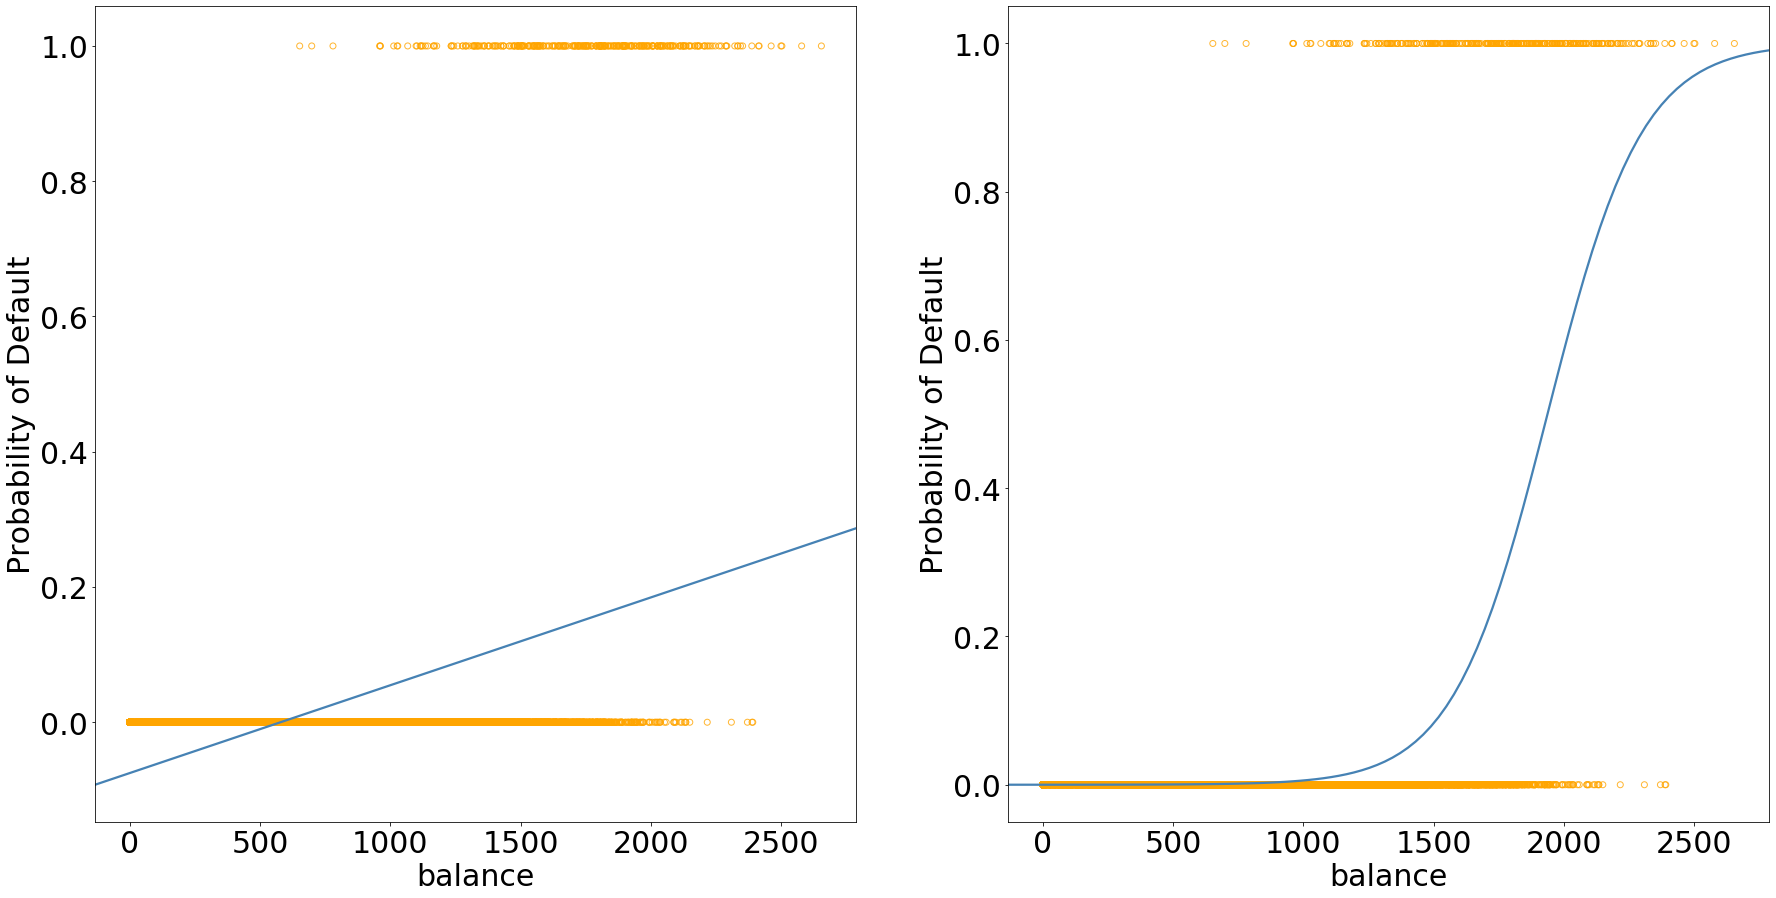

In [12]:
scatter_dict2 = {"color":"orange", "facecolors":"none", "marker":"|"}
line_dict2 = {"color":"steelblue"}

plt.rcParams.update({'font.size': 30})
fig3, axs3 = plt.subplots(ncols=2, figsize=(30,15))
sns.regplot(x="balance", y="Probability of Default", ci=None, data=default, ax= axs3[0], scatter_kws=scatter_dict2, line_kws=line_dict2)
sns.regplot(x="balance", y="Probability of Default", ci=None, logistic=True, data=default, ax=axs3[1], scatter_kws=scatter_dict2, line_kws=line_dict2)

In [13]:
fig3.savefig("logistic3.png")